PUNTO 2


In [25]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def load_and_prepare_data():
    data = fetch_california_housing()
    X, y = data.data, data.target
    
    # Agregar columna de 1s para el término independiente
    X = np.hstack([X, np.ones((X.shape[0], 1))])
    
    # Dividir en conjunto de entrenamiento y prueba (80%-20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Escalar características con estadísticas del conjunto de entrenamiento
    scaler = StandardScaler()
    X_train[:, :-1] = scaler.fit_transform(X_train[:, :-1])  # Excluye la columna de 1s
    X_test[:, :-1] = scaler.transform(X_test[:, :-1])  # Usa la misma transformación en prueba
    
    return X_train, X_test, y_train, y_test

def pseudoinverse_solution(X, y):
    # Fórmula: w = (X^T X)^(-1) X^T y
    return np.linalg.inv(X.T @ X) @ X.T @ y

def gradient_descent_solution(X, y, learning_rate=0.01, tol=1e-6, max_iter=10000):
    n, d = X.shape
    w = np.zeros(d)  #inicialización de los coeficientes
    trajectory = []  #para guardar el progreso
    errors = [] #para guardar ECM
    
    for i in range(max_iter):
        # Gradiente del ECM
        gradient = -2 / n * X.T @ (y - X @ w)
        
        # Actualizar pesos
        w -= learning_rate * gradient
        
        # Guardar el progreso
        trajectory.append(w.copy())

        error = np.mean((y - X @ w)**2)
        errors.append(error)
        
        # Convergencia
        if np.linalg.norm(gradient) < tol:
            print(f"Convergencia alcanzada en {i + 1} iteraciones.")
            break
    else:
        print("No se alcanzó la convergencia en el número máximo de iteraciones.")
    
    return w, np.array(trajectory), errors


In [26]:
def plot_trajectory(trajectory):
    plt.figure(figsize=(10, 6))
    plt.plot(trajectory)
    plt.xlabel('Iteraciones')
    plt.ylabel('Valores de los coeficientes')
    plt.title('Trayectoria del descenso de gradiente')
    plt.show()

def plot_errors(errors):
    plt.figure(figsize=(10, 6))
    plt.plot(errors)
    plt.xlabel('Iteraciones')
    plt.ylabel('Error cuadrático medio')
    plt.title('Evolución del error cuadrático medio durante el descenso de gradiente')
    plt.show()

def compare_solutions():
    X_train, X_test, y_train, y_test = load_and_prepare_data()
    
    # Solución analítica
    w_analytical = pseudoinverse_solution(X_train, y_train)
    
    # Solución iterativa
    w_gd, trajectory, errors = gradient_descent_solution(X_train, y_train, learning_rate=0.01)
    
    # Evaluación
    train_error_analytical = np.mean((y_train - X_train @ w_analytical)**2)
    train_error_gd = np.mean((y_train - X_train @ w_gd)**2)
    test_error_analytical = np.mean((y_test - X_test @ w_analytical)**2)
    test_error_gd = np.mean((y_test - X_test @ w_gd)**2)
    
    print("Resultados:")
    print(f"Error en entrenamiento (Analítico): {train_error_analytical:.5f}")
    print(f"Error en entrenamiento (Gradiente Descendente): {train_error_gd:.5f}")
    print(f"Error en prueba (Analítico): {test_error_analytical:.5f}")
    print(f"Error en prueba (Gradiente Descendente): {test_error_gd:.5f}")

    plot_errors(errors)
    plot_trajectory(trajectory)


    plt.figure(figsize=(10, 6))
    plt.plot(w_analytical, 'o-', label='Pseudoinversa')
    plt.plot(w_gd, 'x-', label='Descenso de gradiente')
    plt.xlabel('Índice del coeficiente')
    plt.ylabel('Valor del coeficiente')
    plt.title('Comparación de coeficientes obtenidos por pseudoinversa y descenso de gradiente')
    plt.legend()
    plt.show()
    
    return w_analytical, w_gd, trajectory

No se alcanzó la convergencia en el número máximo de iteraciones.
Resultados:
Error en entrenamiento (Analítico): 0.51793
Error en entrenamiento (Gradiente Descendente): 0.51793
Error en prueba (Analítico): 0.55589
Error en prueba (Gradiente Descendente): 0.55589


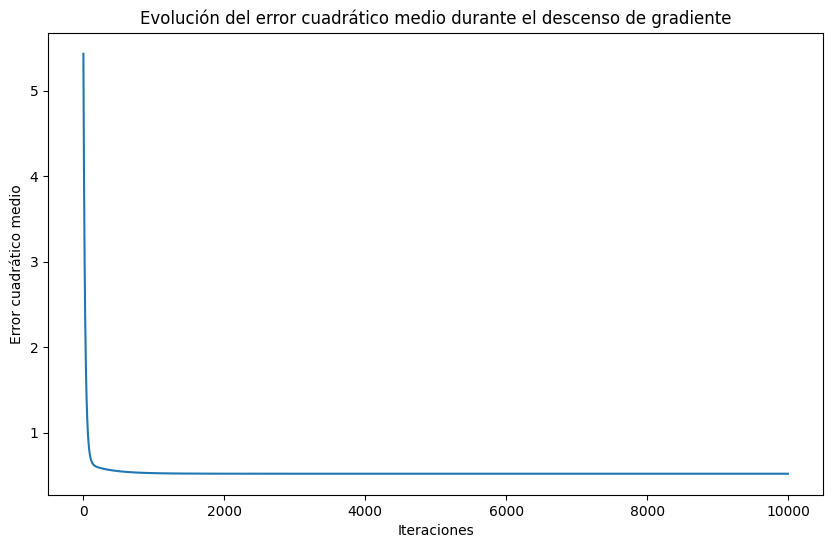

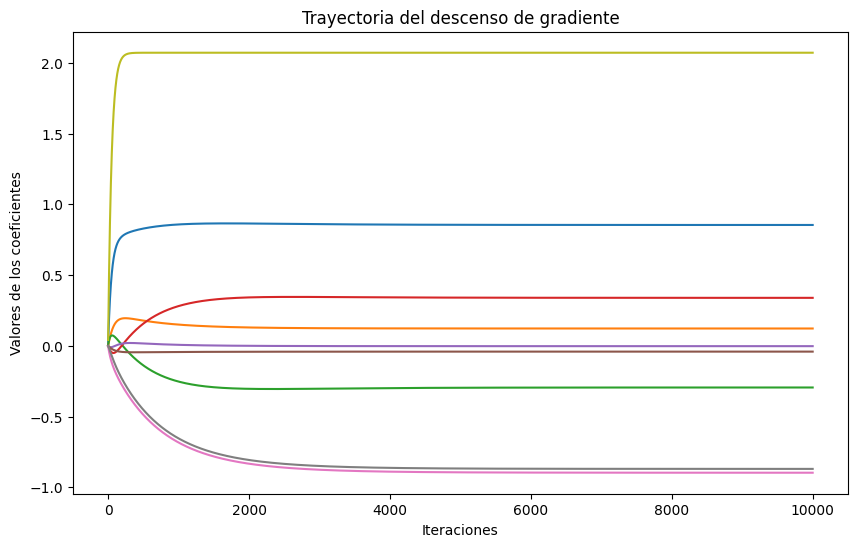

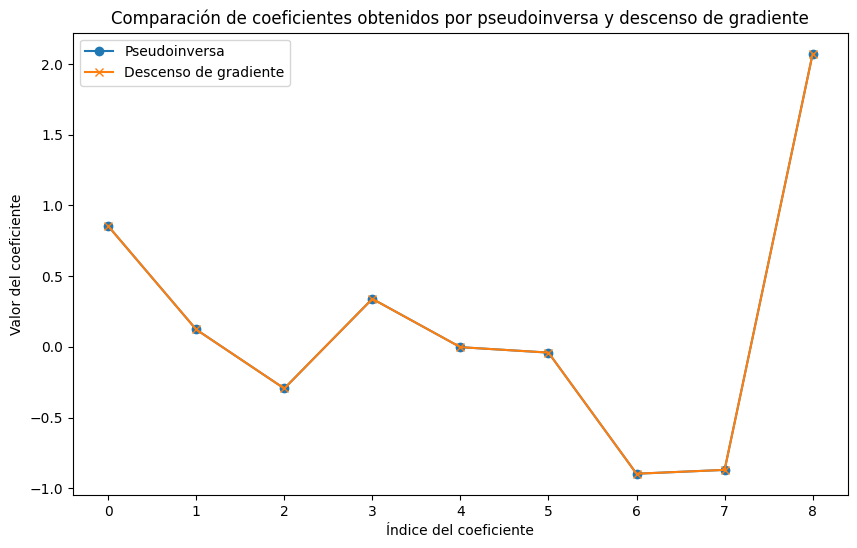

In [27]:
w_analytical, w_gd, trajectory = compare_solutions()